In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
%matplotlib inline


In [2]:
data = np.array([3.54,7.81,12.83,6.73,6.29,15.88,12.27,7.84,10.71,14.60,17.48,12.97,11.34,23.82,19.97,11.51,18.07,22.11,23.12,15.52,20.03,24.36,27.02,21.31])


In [3]:
tx = np.linspace(0, 1, 24)
tx


array([0.        , 0.04347826, 0.08695652, 0.13043478, 0.17391304,
       0.2173913 , 0.26086957, 0.30434783, 0.34782609, 0.39130435,
       0.43478261, 0.47826087, 0.52173913, 0.56521739, 0.60869565,
       0.65217391, 0.69565217, 0.73913043, 0.7826087 , 0.82608696,
       0.86956522, 0.91304348, 0.95652174, 1.        ])

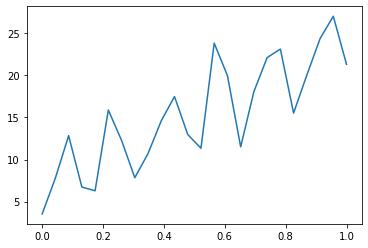

In [4]:
plt.plot(tx, data)

In [5]:
tx1 = np.array([ [1,0], [1, 0.04347826],[1, 0.08695652],[1, 0.13043478], [1, 0.17391304], [1, 0.2173913], [1, 0.26086957], [1, 0.30434783], [1, 0.34782609] , [1,0.39130435] ,[1, 0.43478261] , [1,  0.47826087] , [1, 0.52173913] , [1, 0.56521739] , [1, 0.60869565] , [1, 0.65217391] , [1, 0.69565217] , [1, 0.73913043] , [1, 0.7826087] , [1, 0.82608696] , [1, 0.86956522] , [1, 0.91304348] , [1, 0.95652174], [1, 1]   ])


In [6]:
B = np.linalg.lstsq(tx1,data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [7]:
B = B[0]
print(B)

[ 6.59703336 17.40009996]


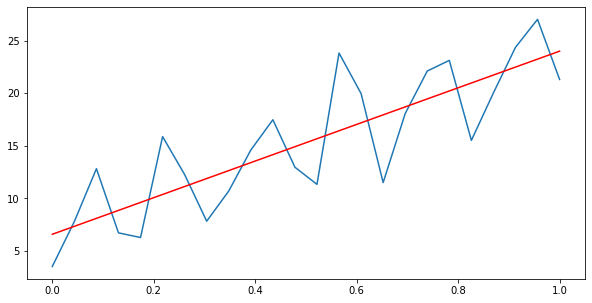

In [88]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data) # строим исходный ВР
plt.plot(tx, B[0] + B[1] * tx , 'r') # строим его тренд
plt.show()

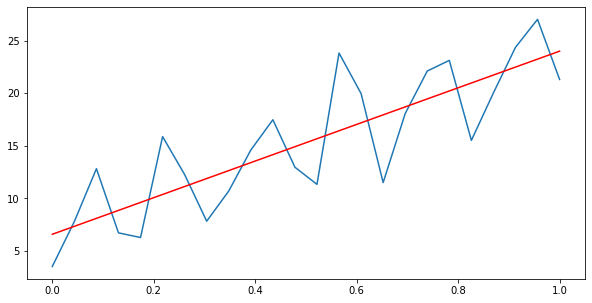

17.400100000000002
6.597033333333336


In [89]:
bb = np.polyfit(tx, data, 1) # полиномиальная кривая 1-го порядка
plt.figure(figsize = (10, 5))
plt.plot(tx, data)
plt.plot(tx, bb[1] + bb[0]*tx, 'r') # Внимание! Коэф. β в другом порядке
plt.show()
print(bb[0])
print(bb[1])

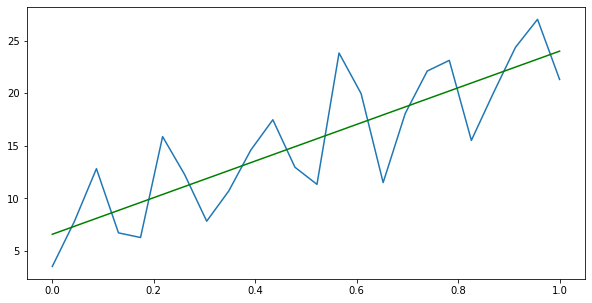

In [90]:
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(tx, data)
# считаем значения полинома на заданной временной сетке
plt.plot(tx, p(tx), 'g')
plt.show()

LinregressResult(slope=17.400100000000005, intercept=6.59703333333333, rvalue=0.8238777097927528, pvalue=7.527212552150138e-07, stderr=2.5520117561118965)


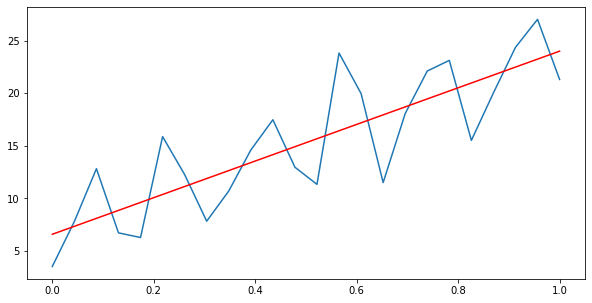

In [91]:
out = stats.linregress(tx, data)
print(out) # выведет все коэффициенты и статистику регрессии
plt.figure(figsize = (10, 5))
plt.plot(tx, data) # строим график кривой вместе с трендом
plt.plot(tx, out.intercept + out.slope*tx, 'r')
plt.show()

In [12]:
def func(tx, b0, b1): # описываем функцию тренда
    return (b0 + b1 * tx) # линейный тренд с 2 параметрами
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, tx, data) # проводим подгонку МНК
print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки

[ 6.59703335 17.40009996]
[[ 2.21811526 -3.25638199]
 [-3.25638199  6.51276402]]


In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(tx.reshape(-1,1), data)
print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(tx.reshape(-1,1), data))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,


[17.4001]
6.597033333333334
0.6787744806933509


In [40]:
import statsmodels.api as sm
x_ = sm.add_constant(tx.reshape(-1,1)) # создаем простую модель
# вида ( ) 0 1  t = + t
smm = sm.OLS(data, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
print(res.params) # получаем результирующие коэффициенты

[ 6.59703333 17.4001    ]


In [72]:
tx2 = np.array([ [1,0,0], [1, 0.04347826, 0.04347826*0.04347826],[1, 0.08695652,0.08695652*0.08695652],[1, 0.13043478, 0.13043478*0.13043478], [1, 0.17391304, 0.17391304*0.17391304], [1, 0.2173913,  0.2173913*0.2173913], [1, 0.26086957, 0.26086957*0.26086957], [1, 0.30434783, 0.30434783*0.30434783], [1, 0.34782609,  0.34782609*0.34782609] , [1,0.39130435, 0.39130435*0.39130435] ,[1, 0.43478261, 0.43478261*0.43478261] , [1,  0.47826087, 0.47826087*0.47826087] , [1, 0.52173913, 0.52173913*0.52173913] , [1, 0.56521739, 0.56521739*0.56521739] , [1, 0.60869565, 0.60869565*0.60869565] , [1, 0.65217391, 0.65217391*0.65217391] , [1, 0.69565217, 0.69565217*0.69565217] , [1, 0.73913043, 0.73913043*0.73913043] , [1, 0.7826087, 0.7826087*0.7826087] , [1, 0.82608696, 0.82608696*0.82608696] , [1, 0.86956522, 0.86956522*0.86956522] , [1, 0.91304348, 0.91304348*0.91304348] , [1, 0.95652174,  0.95652174 * 0.95652174], [1,1,1]   ])


In [73]:
#2 степени

B1 = np.linalg.lstsq(tx2,data) 
B1 = B1[0]
print(B1)


[ 6.31064234 19.19655267 -1.79645271]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


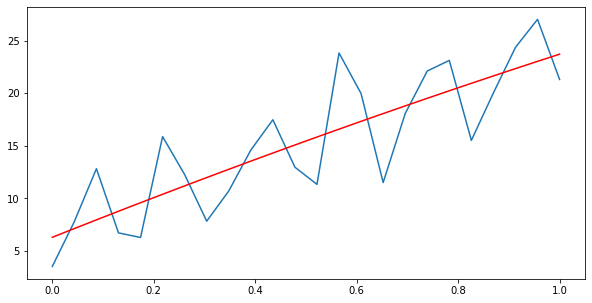

In [93]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data) # строим исходный ВР
plt.plot(tx, B1[0] + B1[1] * tx + (B1[2])*tx**2 , 'r') # строим его тренд
plt.show()

In [92]:
tx3 = np.zeros((24, 4))
for i in range(len(tx2)):
    tx3[i][0] = 1
    tx3[i][1] = tx[i]
    tx3[i][2] = tx[i]**2
    tx3[i][3] = tx[i]**3


In [ ]:
#3 степени

In [95]:

B2 = np.linalg.lstsq(tx3,data) 
B2 = B2[0]
print(B2)

[  5.96352707  23.86532794 -13.72008677   7.94908931]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


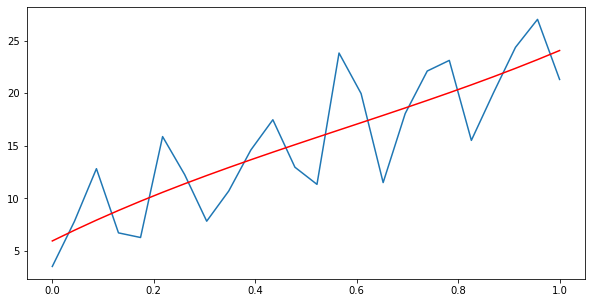

In [96]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data) # строим исходный ВР
plt.plot(tx, B2[0] + B2[1] * tx + B2[2]*tx**2 + B2[3]*tx**3 , 'r') # строим его тренд
plt.show()

In [ ]:
#exp

In [98]:
def func(tx, b0, b1): # описываем функцию тренда 
    return b0*np.exp(b1*tx) #
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, tx, data)  # проводим подгонку МНК 
print(popt) # получаем коэффициенты b0 & b1 
print(pcov) # ковариационная матрица ошибок подгонки

[8.37092502 1.10239355]
[[ 1.28057592 -0.19425166]
 [-0.19425166  0.03392565]]


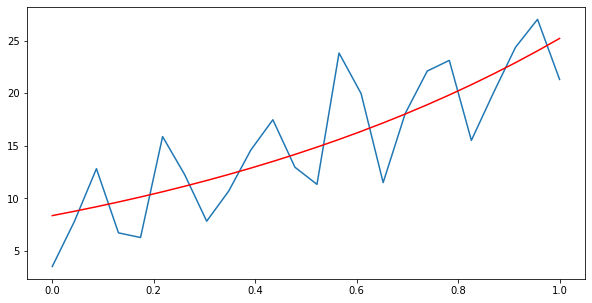

In [99]:
plt.figure(figsize = (10, 5)) 
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx, popt[0]*np.exp(popt[1]*tx) , 'r')  # строим его тренд 
plt.show() 

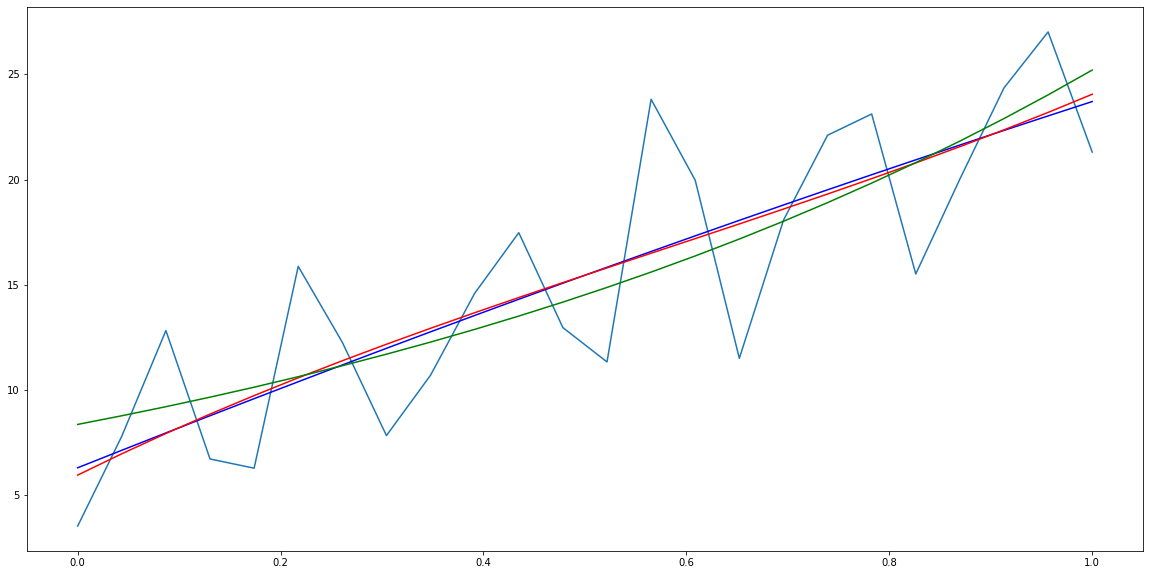

In [110]:
plt.figure(figsize = (20, 10)) 
plt.plot(tx, data) # строим исходный ВР
plt.plot(tx, B1[0] + B1[1] * tx + (B1[2])*tx**2 , 'b')
plt.plot(tx, B2[0] + B2[1] * tx + B2[2]*tx**2 + B2[3]*tx**3 , 'r') # строим его тренд
plt.plot(tx, popt[0]*np.exp(popt[1]*tx) , 'g')  # строим его тренд 

plt.show()

In [ ]:
#sglashivanie

In [111]:
def smooth(x, window_len):     
    if window_len<3:         
        return x     
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]     
    w=np.ones(window_len, 'd')     
    y=np.convolve(w/w.sum(), s, mode='same')     
    return y[window_len:-window_len+1] 

In [112]:
Smoothed_data1 = smooth(data, 3) 
Smoothed_data2 = smooth(data, 7) 
Smoothed_data3 = smooth(data, 11) 

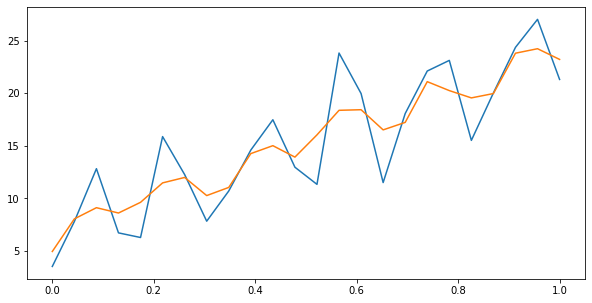

In [113]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx,Smoothed_data1)  
plt.show() 
 

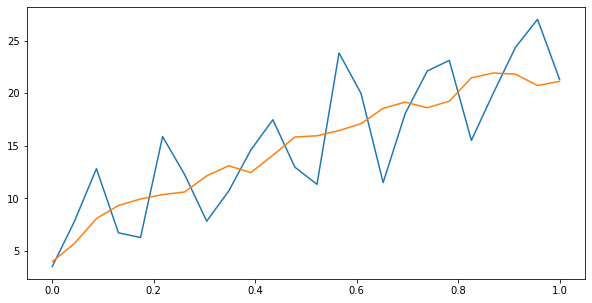

In [114]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx, Smoothed_data2)  
plt.show() 

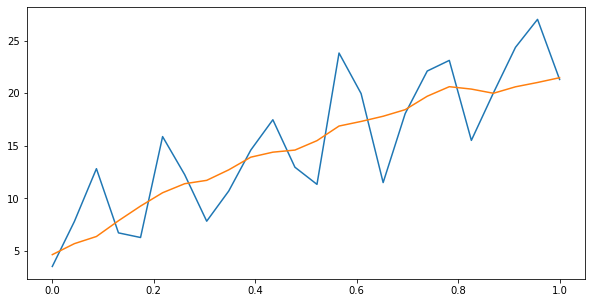

In [115]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx, Smoothed_data3)  
plt.show() 

In [141]:

def smooth3(x):   
    t = np.zeros(24)
    for j in range(len(x)):  
        if j == 0:
            t[j] = (1/3) * (x[j] + x[j+1])
        elif j == len(x)-1:
            t[j] = (1/3) * (x[j-1] +x[j])
        else:
            t[j] = (1/3) * (x[j-1] +x[j] + x[j+1])
    return t


In [142]:
Smoothed_data10 = smooth3(data) 

print(Smoothed_data10)

 

[ 3.78333333  8.06        9.12333333  8.61666667  9.63333333 11.48
 11.99666667 10.27333333 11.05       14.26333333 15.01666667 13.93
 16.04333333 18.37666667 18.43333333 16.51666667 17.23       21.1
 20.25       19.55666667 19.97       23.80333333 24.23       16.11      ]


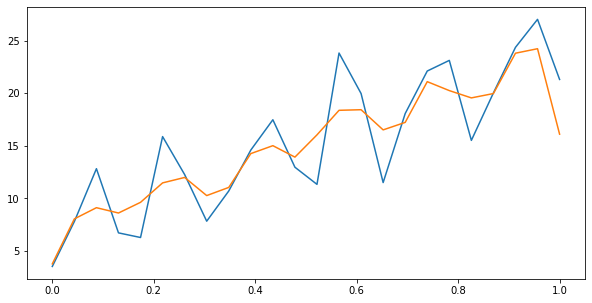

In [143]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx, Smoothed_data10)  
plt.show() 

In [147]:
def smooth7(x):   
    t = np.zeros(24)
    for j in range(len(x)):  
        if j == 0:
            t[j] = (1/7) * (x[j] + x[j+1] + x[j+2] + x[j+3])
        elif j == 1:
            t[j] = (1/7) * (x[j-1] +x[j] + x[j+1] + x[j+2] + x[j+3])
        elif j == 2:
            t[j] = (1/7) * (x[j-2] + x[j-1] +x[j] + x[j+1] + x[j+2] + x[j+3])
        elif j == len(x)-3:
            t[j] = (1/7) * (x[j-3] + x[j-2] + x[j-1] +x[j] + x[j+1] + x[j+2])
        elif j == len(x)-2:
            t[j] = (1/7) * (x[j-3] + x[j-2] + x[j-1] +x[j] + x[j+1])
        elif j == len(x)-1:
            t[j] = (1/7) * (x[j-3] + x[j-2] + x[j-1] +x[j])
        else:
            t[j] = (1/7) * (x[j-3] + x[j-2] + x[j-1] +x[j] + x[j+1] + x[j+2] + x[j+3] )
    return t

In [150]:
Smoothed_data20 = smooth7(data) 
Smoothed_data20

array([ 4.41571429,  5.31428571,  7.58285714,  9.33571429,  9.95      ,
       10.36428571, 10.61714286, 12.15285714, 13.10714286, 12.45857143,
       14.10857143, 15.84142857, 15.95571429, 16.45142857, 17.11285714,
       18.56285714, 19.16      , 18.61857143, 19.24571429, 21.46142857,
       21.92428571, 18.76571429, 15.46285714, 13.24571429])

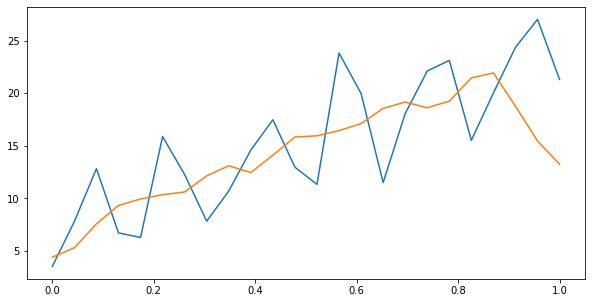

In [151]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx, Smoothed_data20)  
plt.show() 

In [155]:
def exp_sgla(x):
    t = np.zeros(24)
    for j in range(0, 24):
        if j == 0:
            t[j] = x[j]
        else:
            t[j] = ((1 - 0.5)*t[j-1] + 0.5 * x[j])
    return t



In [156]:
Exp_data = exp_sgla(data) 
Exp_data

array([ 3.54      ,  5.675     ,  9.2525    ,  7.99125   ,  7.140625  ,
       11.5103125 , 11.89015625,  9.86507813, 10.28753906, 12.44376953,
       14.96188477, 13.96594238, 12.65297119, 18.2364856 , 19.1032428 ,
       15.3066214 , 16.6883107 , 19.39915535, 21.25957767, 18.38978884,
       19.20989442, 21.78494721, 24.4024736 , 22.8562368 ])

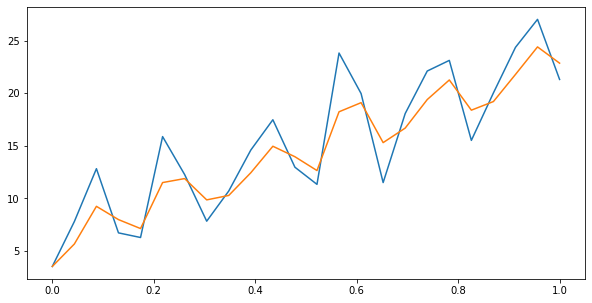

In [157]:
plt.figure(figsize = (10, 5))
plt.plot(tx, data)     # строим исходный ВР 
plt.plot(tx, Exp_data)  
plt.show()